## Code source du modèle

### Avertissement

⚠️ **Veuillez effectuer l'étape de configuration avec soin**

Il est essentiel de compléter l'étape de configuration correctement pour éviter toute erreur. Veuillez vous assurer de respecter les points suivants :

- **Avant tout push vers GitHub,** assurez-vous de ne pas laisser d'informations sensibles ou compromettantes dans votre code.
- **Le dépôt doit être cloné dans le bon répertoire sur Google Drive** pour garantir que les fichiers sont correctement synchronisés.
- **Git doit être correctement configuré** avant d'effectuer toute action sur le dépôt, telles que `git add`, `git commit`, etc.

---

⚠️ **Ne jamais exposer votre `GITHUB_TOKEN`**.

Il est impératif que votre `GITHUB_TOKEN` soit gardé secret. Ne le partagez **jamais** dans des dépôts publics, des fichiers non sécurisés ou des endroits où des tiers pourraient y accéder. Toute fuite de votre token pourrait entraîner des accès non autorisés à vos projets et à vos données privées.

---

### Conseil : Utilisation de `!bash -c` pour les commandes Linux dans Google Colab

Lorsque vous exécutez des commandes Linux dans Google Colab, il est recommandé d'utiliser `!bash -c` pour enchaîner plusieurs commandes dans un même environnement. Cela vous permet de garder toutes les commandes dans un même contexte de shell. Par exemple, si vous voulez changer de répertoire et exécuter plusieurs commandes, vous pouvez utiliser la commande suivante :

```bash
!bash -c "cd /content/drive/MyDrive/SAE_S5 && git status"
```

### Explication du bloc "Conseil" :

- **Utilisation de `!bash -c`** : Quand tu souhaites enchaîner plusieurs commandes dans Google Colab dans un même shell (par exemple, changer de répertoire avec `cd` puis exécuter d'autres commandes comme `git status`), tu peux utiliser `!bash -c`. Cela te permet d'éviter de devoir ouvrir plusieurs cellules ou d'essayer de combiner les commandes de manière incorrecte.
  
- **Syntaxe** : La commande `!bash -c "commandes"` permet d'exécuter plusieurs commandes Linux dans un même contexte, ce qui garantit qu'elles seront exécutées les unes après les autres dans le même environnement de shell.

Cela permet une meilleure gestion des environnements de travail et d'éviter des erreurs comme celle de ne pas pouvoir exécuter des commandes successivement dans différentes cellules.

# 1 . Connexion avec le drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2 . Installer la configuration

In [ ]:
# Attendre quelque secondes avant de continuer (sync avec le drive)
!mkdir -p /content/drive/MyDrive/SAE_S5

In [ ]:
bash_script = """
#!/bin/bash

#####################
#                   #
#       Config      #
#                   #
#####################

apt-get install git

if [ "$#" -ne 3 ]; then
    echo "Usage: $0 <TOKEN> <GITHUB_USER> <GITHUB_EMAIL>"
    exit 1
fi

TOKEN=$1
GITHUB_USER=$2
GITHUB_EMAIL=$3

REPO_DIR="/content/drive/MyDrive/SAE_S5"

if [ -d "$REPO_DIR" ]; then
  echo "Le dossier existe déjà. Suppression du dossier existant..."
  rm -rf "$REPO_DIR"
fi

mkdir -p "$REPO_DIR"

git clone https://$TOKEN@github.com/JagoOgaj/SAE_S5.git "$REPO_DIR"

cd "$REPO_DIR"

git config --global user.name "$GITHUB_USER"
git config --global user.email "$GITHUB_EMAIL"

git remote set-url origin https://$TOKEN@github.com/JagoOgaj/SAE_S5.git

pip install -r "$REPO_DIR/requirements.txt"

echo "Configuration terminée avec succès!"
"""

with open('/content/drive/MyDrive/SAE_S5/config.sh', 'w') as f:
    f.write(bash_script)

print("Le fichier config.sh a été créé avec succès!")

Le fichier config.sh a été créé avec succès!


In [ ]:
!chmod +x /content/drive/MyDrive/SAE_S5/config.sh

In [ ]:
#!bash /content/drive/MyDrive/SAE_S5/config.sh <Token> <User Github> <Email Github>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Le dossier existe déjà. Suppression du dossier existant...
Cloning into '/content/drive/MyDrive/SAE_S5'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 56 (delta 20), reused 48 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 90.92 KiB | 3.64 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Configuration terminée avec succès!


## Git Command

In [ ]:
#Use here git command
bash_script = """
#!/bin/bash

#####################
#                   #
#    Git Command    #
#                   #
#####################

REPO_DIR="/content/drive/MyDrive/SAE_S5"

cd "$REPO_DIR"

# Add comand here #

"""

with open('/content/drive/MyDrive/SAE_S5/git.sh', 'w') as f:
    f.write(bash_script)


!chmod +x /content/drive/MyDrive/SAE_S5/git.sh

!bash /content/drive/MyDrive/SAE_S5/git.sh

On branch samy
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	git.sh

nothing added to commit but untracked files present (use "git add" to track)


## Model gender detection Code Source

## 1. Make labels


In [ ]:
#Imports
import zipfile
import cv2
import numpy as np

In [ ]:
#Labels

path_zipFile: str = "/content/drive/MyDrive/SAE_S5/UTKFace.zip"

folder: str = "UTKFace/"

pixels: list = []
gender : list = []

with zipfile.ZipFile(path_zipFile, "r") as z :
  for imgName in z.namelist():
    if imgName.startswith(folder) and imgName.endswith(".jpg") :
      genders = int(imgName.split("_")[1])

      with z.open(imgName) as imgFile :
        img = np.frombuffer(imgFile.read(), np.uint8)
        img = cv2.imdecode(img, cv2.IMREAD_COLOR)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (100, 100))

        pixels.append(np.array(img))
        gender.append(np.array(genders))


In [ ]:
# Optimize labels with numpy

pixels = np.array(pixels) / 255
gender = np.array(gender, np.uint64)

In [ ]:
# Shape

print(f"Le nombre d'image -> {len(pixels)}\n")
print(f"Le nombre de genre associés aux images -> {len(gender)}\n")
print(f"Shape de pixels -> {pixels.shape}\n")
print(f"Shape de gender -> {gender.shape}")


Le nombre d'image -> 23708

Le nombre de genre associés aux images -> 23708

Shape de pixels -> (23708, 100, 100)

Shape de gender -> (23708,)


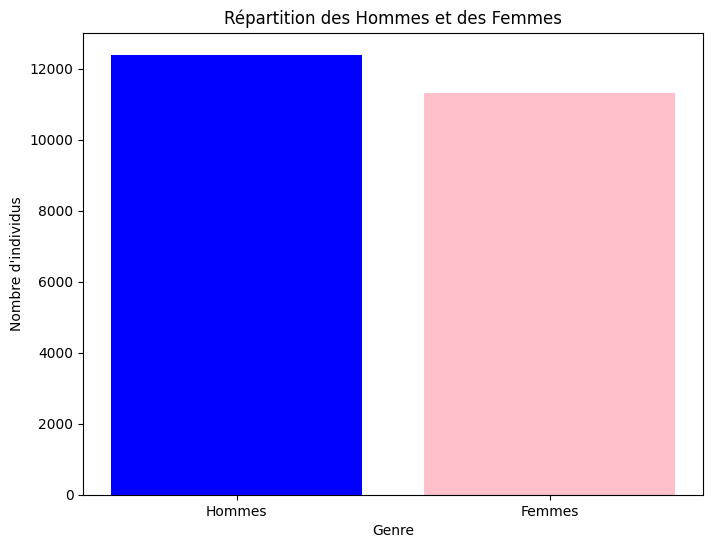

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Comptage des hommes (0) et des femmes (1)
hommes = np.sum(gender == 0)  # Nombre d'hommes (label 0)
femmes = np.sum(gender == 1)  # Nombre de femmes (label 1)

# Préparer les données pour l'affichage
labels = ['Hommes', 'Femmes']
counts = [hommes, femmes]

# Création du graphique à barres
plt.figure(figsize=(8,6))
plt.bar(labels, counts, color=['blue', 'pink'])

# Ajouter des titres et labels
plt.title("Répartition des Hommes et des Femmes")
plt.xlabel("Genre")
plt.ylabel("Nombre d'individus")
plt.show()

## 2. Make X_train , X_test, y_train and y_test

In [ ]:
# Imports
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pixels, gender, random_state = 93)

In [ ]:
print(f"Nombre d'echantillons données en entrée pour l'entrainement -> {len(X_train)}\n")
print(f"Nombre d'échantillins données en entreé pour les test -> {len(X_test)}\n")
print(f"Nombre de label associés au enchantillons d'entrainement -> {len(y_train)}\n")
print(f"Nombre de label associés au enchantillons de test -> {len(y_test)}")

Nombre d'echantillons données en entrée pour l'entrainement -> 17781

Nombre d'échantillins données en entreé pour les test -> 5927

Nombre de label associés au enchantillons d'entrainement -> 17781

Nombre de label associés au enchantillons de test -> 5927


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

datagen = ImageDataGenerator(
  rotation_range=10,
  width_shift_range=0.1,
  height_shift_range=0.1,
  zoom_range=0.1,
  horizontal_flip=True
)

datagen.fit(X_train)

## Model architecture

## 1. Architecture

In [ ]:
# Imports
import tensorflow as tf

from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPooling2D, AvgPool2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers  import l2

In [ ]:
"""
    Explication CNN

    Couches convolutionnelles (Conv2D) : Ces couches sont responsables de l’extraction des caractéristiques locales à partir des images. Elles augmentent progressivement la complexité des motifs appris, avec des filtres de plus en plus nombreux.

    MaxPooling2D : Réduit les dimensions des images tout en conservant les informations essentielles.

    Dropout : Utilisé pour régulariser le modèle et éviter le sur-apprentissage.

    Dense : Couches entièrement connectées qui permettent au modèle d’apprendre des relations complexes entre les caractéristiques extraites par les couches convolutionnelles.

    Sigmoid en sortie : Cela indique qu’il s’agit probablement d’une tâche de classification binaire (dans notre cas homme/femme).

"""


input = Input(shape = (100, 100, 1))

conv1 = Conv2D(32, (3,3), padding = 'same', strides = (1, 1), kernel_regularizer = l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2))(conv1)

conv2 = Conv2D(64, (3,3), padding = 'same', strides = (1, 1), kernel_regularizer = l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2))(conv2)

conv3 = Conv2D(128, (3,3), padding = 'same', strides = (1, 1), kernel_regularizer = l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2))(conv3)

conv4 = Conv2D(256, (3,3), padding = 'same', strides = (1, 1), kernel_regularizer = l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2))(conv4)

flatten = Flatten()(pool4)

dense1 = Dense(128, activation = 'relu')(flatten)
drop1 = Dropout(0.2)(dense1)
output = Dense(2, activation = 'sigmoid')(drop1)

In [ ]:
# Compile model

model = Model(inputs = input, outputs = output)
model.compile(optimizer = 'adam', loss = ["sparse_categorical_crossentropy"], metrics = ['accuracy'])


In [ ]:
#Summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 100, 100, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 100, 100, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 1,567,874 (5.98 MB)

 Trainable params: 1,567,874 (5.98 MB)

 Non-trainable params: 0 (0.00 B)

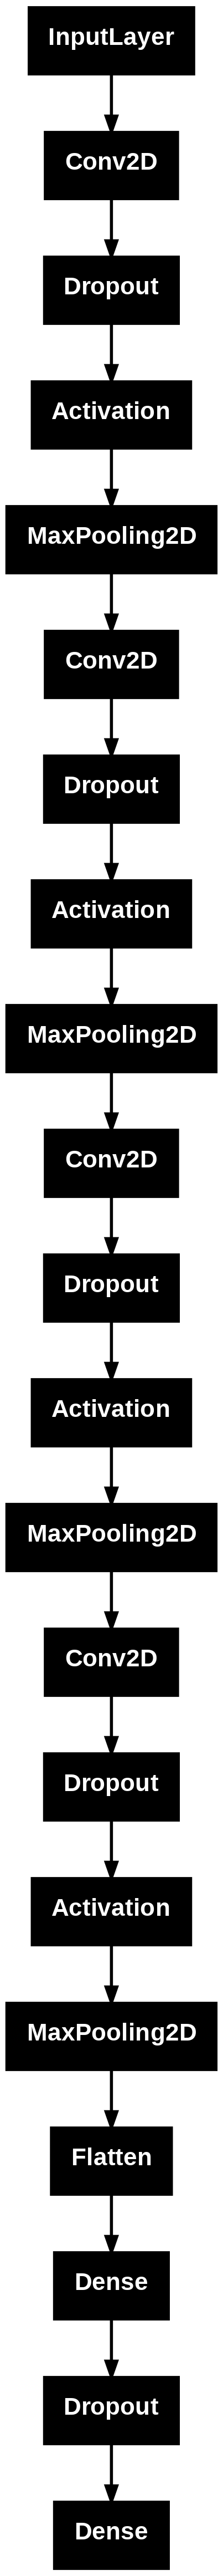

In [ ]:
#Plot model

from tensorflow.keras.utils import plot_model
plot_model(model)

## 2. Save model

In [ ]:
# Imports
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
#Save

model_path: str = "/content/drive/MyDrive/SAE_S5/model/sae_model_gender_detection.keras"

checkpoint = ModelCheckpoint(
    model_path,                   # Le chemin où le modèle sera sauvegardé
    monitor='loss',               # La métrique à surveiller pendant l'entraînement
    verbose=1,                    # Afficher des messages lors de l'enregistrement du modèle
    save_best_only=True,          # Ne sauvegarder que le meilleur modèle selon la métrique
    save_weights_only=False,      # Sauvegarder à la fois les poids et la structure du modèle
    mode='auto',                  # Choisir le mode d'évaluation (auto, min, max)
    save_freq='epoch'             # Fréquence d'enregistrement du modèle (ici à la fin de chaque époque)
)

early_stopping = EarlyStopping(
      monitor='val_loss',   # Surveillez plutôt la perte pour éviter overfitting
      patience=15,           # Plus de patience avant d'arrêter l'entraînement
      restore_best_weights=True
)


callback_list = [checkpoint, early_stopping]


## Training

## 1. Train model

In [ ]:
# Train with the GPU

with tf.device('/GPU:0'):
  save = model.fit(
      datagen.flow(X_train, y_train, batch_size=64),
      validation_data=(X_test, y_test),
      epochs=100,
      class_weight={0: 1., 1: 1.1},
      callbacks=callback_list
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.6134 - loss: 0.7838
Epoch 1: loss improved from inf to 0.68574, saving model to /content/drive/MyDrive/SAE_S5/model/sae_model_gender_detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 36s 106ms/step - accuracy: 0.6139 - loss: 0.7831 - val_accuracy: 0.7618 - val_loss: 0.5499
Epoch 2/100
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7619 - loss: 0.5511
Epoch 2: loss improved from 0.68574 to 0.51542, saving model to /content/drive/MyDrive/SAE_S5/model/sae_model_gender_detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.7620 - loss: 0.5509 - val_accuracy: 0.8274 - val_loss: 0.4252
Epoch 3/100
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8150 - loss: 0.4587
Epoch 3: loss improved from 0.51542 to 0.45655, saving model to /content/drive/MyDrive/SAE_S5/model/sae_model_gender_detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 42s 82ms/step - accuracy: 0.8150 - loss: 0.4586 - val_accuracy: 0.8401 - val_loss: 0.

## Validation

## 1. Graph

In [ ]:
# Imports
import matplotlib.pyplot as plt

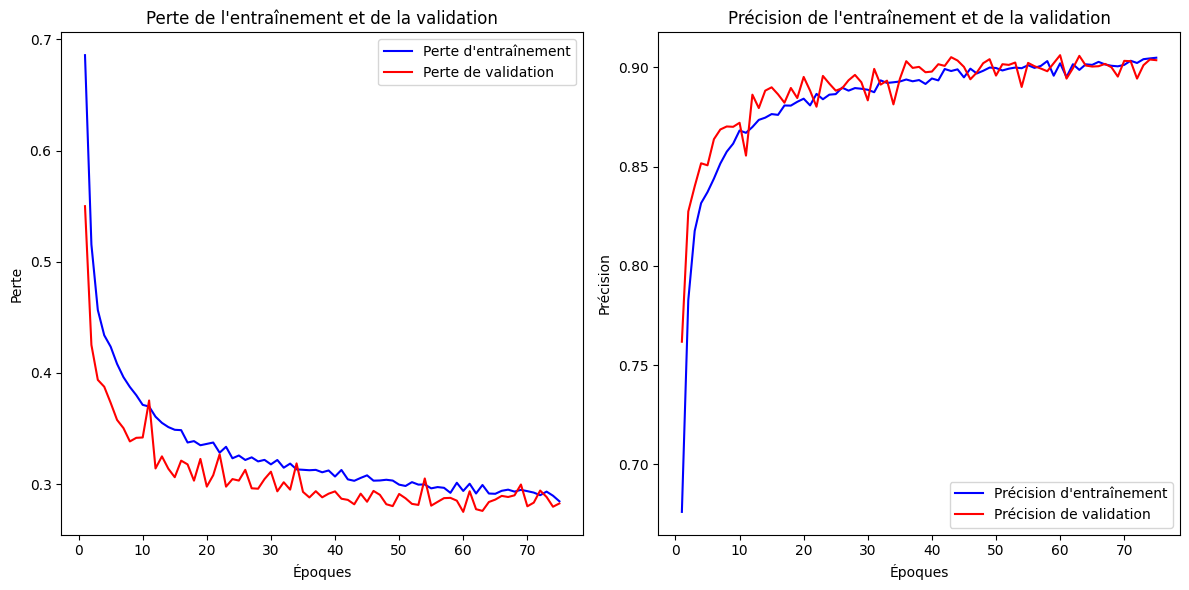

In [ ]:
# Extraire les métriques depuis 'save.history'
epochs = range(1, len(save.history['loss']) + 1)
train_loss = save.history['loss']
val_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
val_accuracy = save.history['val_accuracy']

# Créer des sous-graphiques (2 graphiques : perte et précision)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Premier graphique : Perte (Loss)
ax1.plot(epochs, train_loss, label='Perte d\'entraînement', color='blue')
ax1.plot(epochs, val_loss, label='Perte de validation', color='red')
ax1.set_title('Perte de l\'entraînement et de la validation')
ax1.set_xlabel('Époques')
ax1.set_ylabel('Perte')
ax1.legend()

# Deuxième graphique : Précision (Accuracy)
ax2.plot(epochs, train_accuracy, label='Précision d\'entraînement', color='blue')
ax2.plot(epochs, val_accuracy, label='Précision de validation', color='red')
ax2.set_title('Précision de l\'entraînement et de la validation')
ax2.set_xlabel('Époques')
ax2.set_ylabel('Précision')
ax2.legend()

# Afficher les graphiques
plt.tight_layout()  # Ajuste la mise en page pour éviter que les éléments se chevauchent
plt.show()

## 2. Evaluate

In [ ]:
# Imports
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)

print(f'Perte sur les données de test : {loss}')
print(f'Précision sur les données de test : {accuracy}')

186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9034 - loss: 0.2782
Perte sur les données de test : 0.2750149667263031
Précision sur les données de test : 0.9061920046806335


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy : 0.91
Precision : 0.89
Recall : 0.918722
F1-score : 0.90


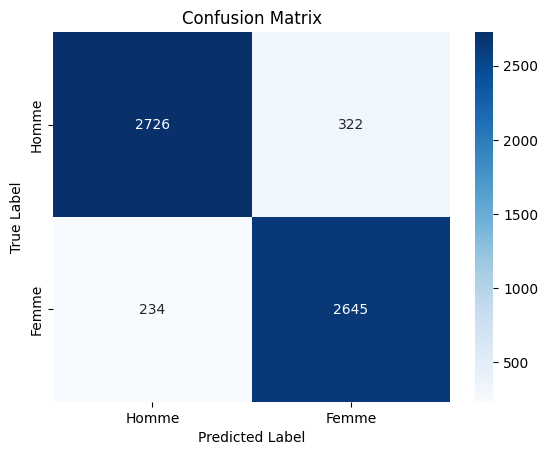

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:2f}")
print(f"F1-score : {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Homme', 'Femme'], yticklabels=['Homme', 'Femme'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Test

In [ ]:
# Import
from PIL import Image

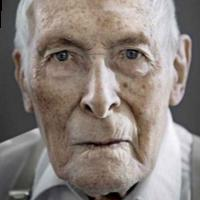

In [ ]:
img_test_path: str = "/content/drive/MyDrive/SAE_S5/110_0_0_20170112213500903.jpg.chip.jpg"
#img_test_path : str = "/content/drive/MyDrive/SAE_S5/110_0_0_20170112213500903.jpg.chip.jpg"
Image.open(img_test_path)

In [ ]:
#Load image

img = cv2.imread(img_test_path, cv2.IMREAD_COLOR)

# Convertir en niveaux de gris
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Redimensionner à (100, 100)
img = cv2.resize(img, (100, 100))

# Normaliser les pixels dans la plage [0, 1]
img = img / 255.0

# Ajouter une dimension supplémentaire pour simuler un lot (lot de 1 image)
img = np.expand_dims(img, axis=0)  # (1, 100, 100)
img = np.expand_dims(img, axis=-1)


In [ ]:
prediction = model.predict(img)

print(prediction)

result = np.argmax(prediction)

if result == 0 :
  print("Homme")
elif result == 1 :
  print("Femme")
else :
  print("Inconnu")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
[[0.78979534 0.17855456]]
Homme


In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
img = cv2.imread(img_test_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

if len(faces) > 0:

  (x, y, w, h) = faces[0]

  face_img = img[y:y+h, x:x+w]

  face_img = cv2.resize(face_img, (100, 100))

  face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)

  test_pixels = [np.array(face_img)]

  new_test_pixels = np.array(test_pixels)

  face_img_pil = Image.fromarray(face_img)

  prediction = model.predict(new_test_pixels)
  print(prediction)

  result = np.argmax(prediction)

  if result == 0 :
    print("Homme")
  elif result == 1 :
    print("Femme")
  else :
    print("Inconnu")

## Model age detection

## 1. Make Labels

In [ ]:
# Imports
import zipfile
import cv2
import numpy as np

In [ ]:
# Load UTKFace dataset

path_zipFile: str = "/content/drive/MyDrive/SAE_S5/UTKFace.zip"

folder: str = "UTKFace/"

pixels = []
age_labels : list = []

with zipfile.ZipFile(path_zipFile, "r") as z :
  for imgName in z.namelist():
    if imgName.startswith(folder) and imgName.endswith(".jpg") :
      ages = int((imgName.split("_")[0]).split("/")[1])
      with z.open(imgName) as imgFile:
        img = np.frombuffer(imgFile.read(), np.uint8)
        img = cv2.imdecode(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128, 128))
        pixels.append(np.array(img))
        age_labels.append(np.array(ages))


In [ ]:
pixels = np.array(pixels) / 255.0
age_labels = np.array(age_labels, np.uint64)

In [ ]:
# Shape

print(f"Le nombre d'image -> {len(pixels)}\n")
print(f"Le nombre d'age associés aux images -> {len(age_labels)}\n")
print(f"Shape de pixels -> {pixels.shape}\n")
print(f"Shape de age -> {age_labels.shape}")


Le nombre d'image -> 23708

Le nombre d'age associés aux images -> 23708

Shape de pixels -> (23708, 128, 128)

Shape de age -> (23708,)


Ages : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]
Nombre d'image par age : [1123, 482, 289, 273, 196, 131, 139, 263, 166, 156, 65, 130, 81, 157, 177, 247, 158, 262, 98, 284, 346, 395, 426, 859, 734, 2197, 615, 918, 570, 724, 350, 664, 143, 409, 880, 483, 293, 325, 266, 526, 132, 266, 157, 100, 440, 153, 170, 153, 148, 381, 138, 232, 241, 353, 268, 236, 97, 271, 82, 293, 161, 125, 103, 50, 259, 77, 94, 100, 56, 147, 33, 98, 63, 32, 148, 58, 28, 69, 23, 133, 22, 40, 18, 24, 155, 35, 10, 34, 33, 82, 2, 13, 5, 0, 9, 17, 0, 0, 9, 11, 2, 0, 1, 0, 5, 0, 0, 0, 0, 5, 1, 0,

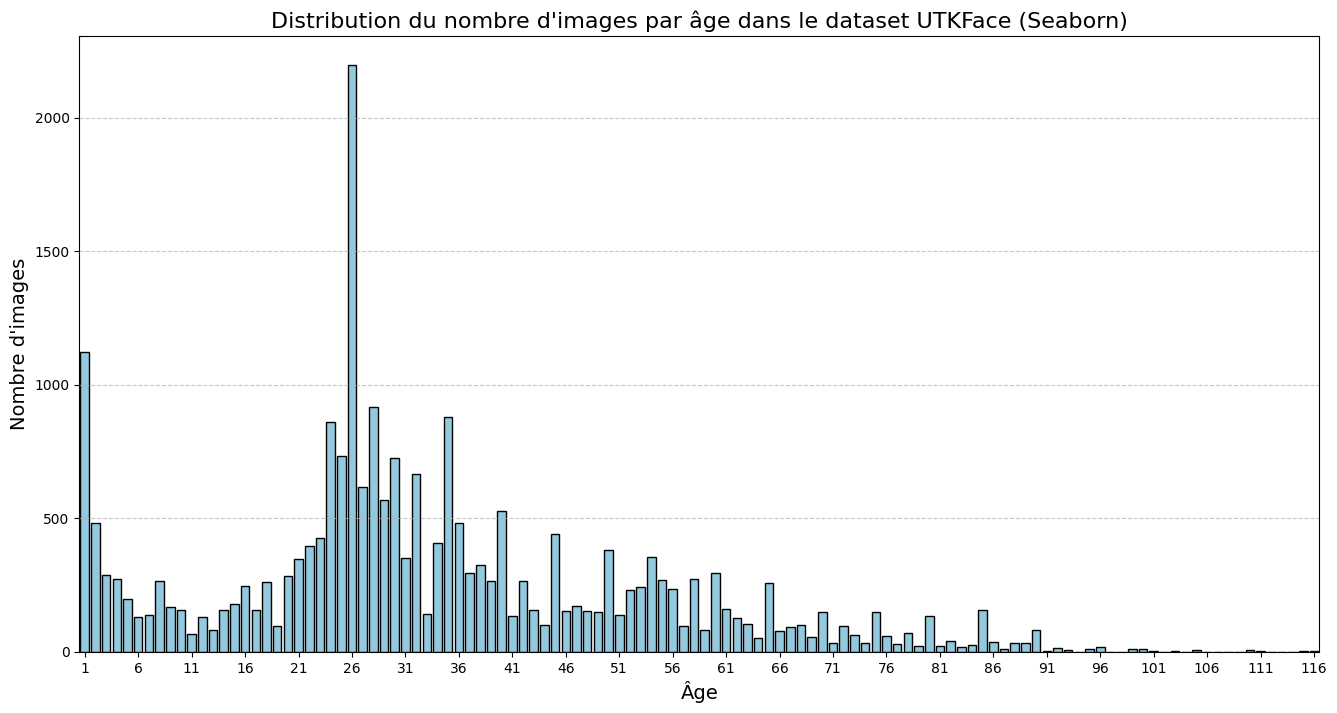

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

age_distribution = {age: 0 for age in range(1, 117)}

for age in age_labels:
  if age in age_distribution:
      age_distribution[age] += 1


ages = list(age_distribution.keys())
counts = list(age_distribution.values())

print(f"Ages : {ages}")
print(f"Nombre d'image par age : {counts}")


plt.figure(figsize=(16, 8))
sns.barplot(x=ages, y=counts, color='skyblue', edgecolor='black')
plt.xlabel('Âge', fontsize=14)
plt.ylabel('Nombre d\'images', fontsize=14)
plt.title('Distribution du nombre d\'images par âge dans le dataset UTKFace (Seaborn)', fontsize=16)
plt.xticks(range(0, 117, 5))  # Graduation tous les 5 ans
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 2 . Preprocessing

In [ ]:
# Imports
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pixels, age_labels, random_state = 93)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Normaliser les étiquettes d'entraînement
y_train_normalized = scaler.fit_transform(y_train.reshape(-1, 1))

# Normaliser les étiquettes de test (en utilisant uniquement la transformation, pas fit_transform)
y_test_normalized = scaler.transform(y_test.reshape(-1, 1))


## 3 . Architecture

In [ ]:
# Imports
import tensorflow as tf

from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPooling2D, AvgPool2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers  import l2
from keras.optimizers import Adam

In [ ]:

#X_train = X_train / 255.0
#X_test = X_test / 255.0


inputs = Input(shape=(128, 128, 1))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flat = Flatten()(maxp_4)
dense_1 = Dense(128, activation='relu')(flat)
dropout = Dropout(0.4)(dense_1)
output = Dense(1, activation='linear')(dropout)

model = Model(inputs=[inputs], outputs=[output])


In [ ]:
# Compile model

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

In [ ]:
# Summary

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,567,745 (5.98 MB)

 Trainable params: 1,567,745 (5.98 MB)

 Non-trainable params: 0 (0.00 B)

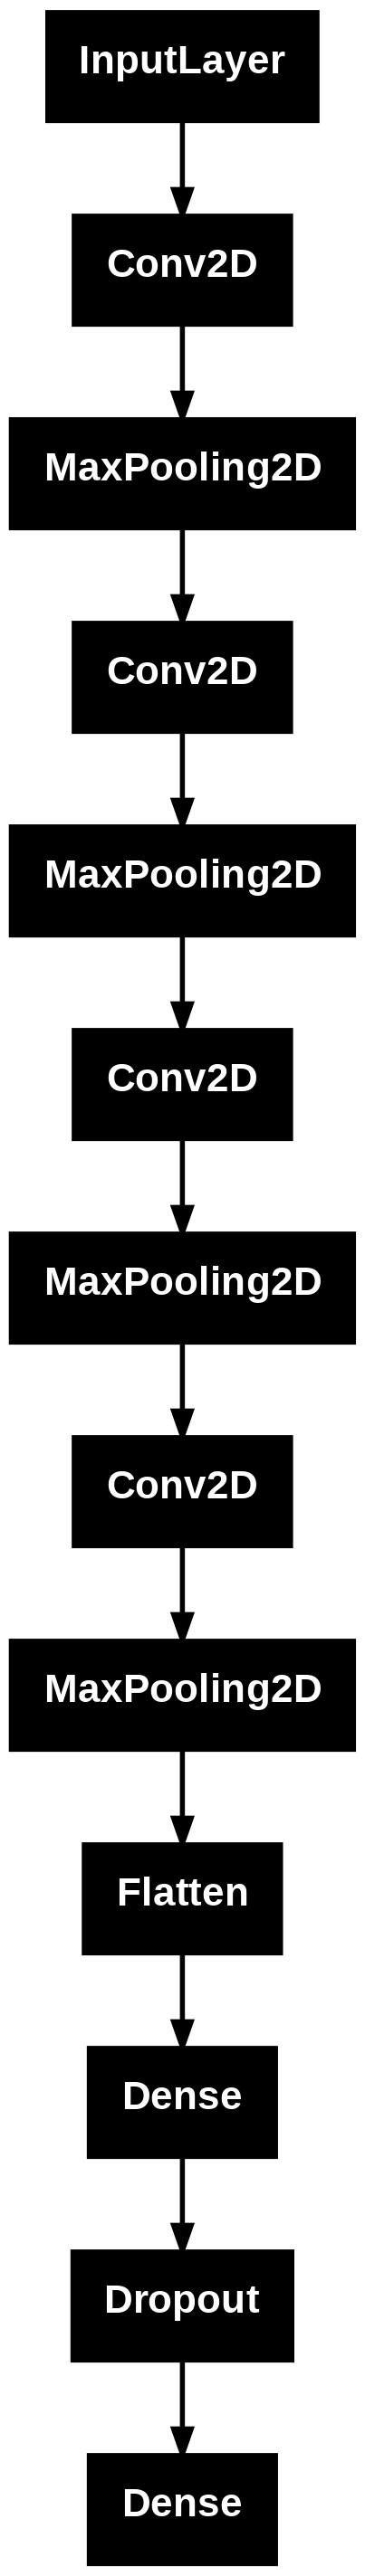

In [ ]:
# Plot model

from tensorflow.keras.utils import plot_model
plot_model(model)

## 4 . Train model

In [ ]:
# Save model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model_path: str = "/content/drive/MyDrive/SAE_S5/model/sae_model_age_prediction2.keras"

checkpoint = ModelCheckpoint(
    model_path,                   # Le chemin où le modèle sera sauvegardé
    monitor='loss',               # La métrique à surveiller pendant l'entraînement
    verbose=1,                    # Afficher des messages lors de l'enregistrement du modèle
    save_best_only=True,          # Ne sauvegarder que le meilleur modèle selon la métrique
    save_weights_only=False,      # Sauvegarder à la fois les poids et la structure du modèle
    mode='auto',                  # Choisir le mode d'évaluation (auto, min, max)
    save_freq='epoch'             # Fréquence d'enregistrement du modèle (ici à la fin de chaque époque)
)

early_stopping = EarlyStopping(
  monitor='val_loss',
  patience=10,
  restore_best_weights=True,
  verbose=1
)


callback_list = [checkpoint, early_stopping]

In [ ]:
history = model.fit(
  datagen.flow(X_train, y_train_normalized, batch_size=64),
  validation_data=(X_test, y_test_normalized),
  epochs=100,
  callbacks=callback_list
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.1651 - mae: 0.1651
Epoch 1: loss improved from inf to 0.13617, saving model to /content/drive/MyDrive/SAE_S5/model/sae_model_age_prediction2.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 49s 145ms/step - loss: 0.1649 - mae: 0.1649 - val_loss: 0.1318 - val_mae: 0.1318
Epoch 2/100
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.1166 - mae: 0.1166
Epoch 2: loss improved from 0.13617 to 0.11201, saving model to /content/drive/MyDrive/SAE_S5/model/sae_model_age_prediction2.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 30s 107ms/step - loss: 0.1165 - mae: 0.1165 - val_loss: 0.0977 - val_mae: 0.0977
Epoch 3/100
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.1059 - mae: 0.1059
Epoch 3: loss improved from 0.11201 to 0.10382, saving model to /content/drive/MyDrive/SAE_S5/model/sae_model_age_prediction2.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 30s 105ms/step - loss: 0.1059 - mae: 0.1059 - val_loss: 0.0882 - val_mae: 0.0882
Epoch 4/100
277/278 ━━━━━━━━━━━━━━━━━━

## 5. Evaluate

In [ ]:
import matplotlib.pyplot as plt

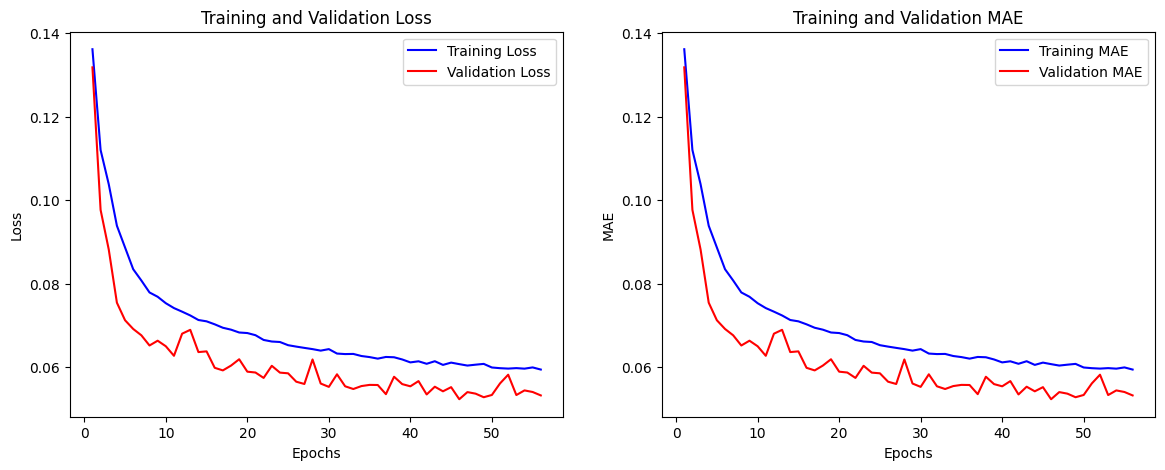

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']

# Créer les graphiques
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(14, 5))

# Graphique de la loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graphique du MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae, 'b-', label='Training MAE')
plt.plot(epochs, val_mae, 'r-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test_normalized, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test Loss: 0.0523
Test MAE: 0.0523


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Supposons que vous avez déjà un modèle entraîné et que vous avez fait des prédictions
y_pred_normalized = model.predict(X_test)  # Prédictions normalisées

# Inverser la normalisation des prédictions
y_pred = scaler.inverse_transform(y_pred_normalized)

# Calculer les métriques sur les prédictions inversées
mae = mean_absolute_error(y_test, y_pred)  # MAE sur les valeurs originales
mse = mean_squared_error(y_test, y_pred)  # MSE sur les valeurs originales
rmse = np.sqrt(mse)  # RMSE = racine carrée du MSE
r2 = r2_score(y_test, y_pred)  # R² (coefficient de détermination)

# Afficher les résultats
print(f"MAE (réel) : {mae}")
print(f"MSE (réel) : {mse}")
print(f"RMSE (réel) : {rmse}")
print(f"R² (réel) : {r2}")

186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
MAE (réel) : 6.011447870082209
MSE (réel) : 70.25364086470285
RMSE (réel) : 8.381744500084864
R² (réel) : 0.8212011456489563


In [ ]:
# Load model
import tensorflow as tf

path = "/content/drive/MyDrive/SAE_S5/model/sae_model_age_prediction2.keras"

model = tf.keras.models.load_model(path)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,703,237 (17.94 MB)

 Trainable params: 1,567,745 (5.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,135,492 (11.96 MB)

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test Loss: 5.7140
Test MAE: 5.7140


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
y_test shape: (5927,)
y_pred shape: (5927,)
errors shape: (5927,)


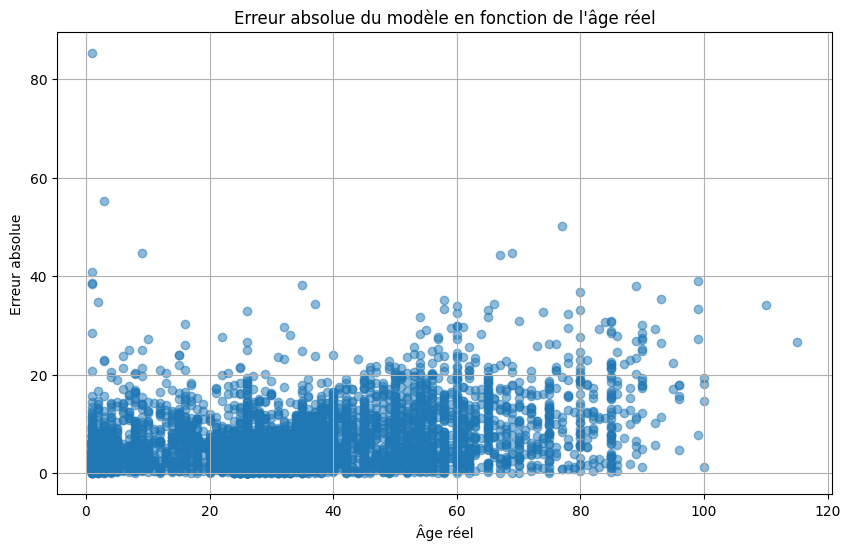

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Prédictions sur les données de test
y_pred_normalized = model.predict(X_test)  # Prédictions normalisées

# Inverser la normalisation des prédictions
y_pred = scaler.inverse_transform(y_pred_normalized)

# Aplatir y_pred pour correspondre à la forme de y_test
y_pred = y_pred.flatten()

# Vérification des tailles
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")

# Calcul de l'erreur absolue
errors = np.abs(y_pred - y_test)

# Vérification des tailles des erreurs
print(f"errors shape: {errors.shape}")

# Tracer l'erreur en fonction des âges réels
plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors, alpha=0.5)
plt.title("Erreur absolue du modèle en fonction de l'âge réel")
plt.xlabel("Âge réel")
plt.ylabel("Erreur absolue")
plt.grid(True)
plt.show()


In [ ]:
from PIL import Image

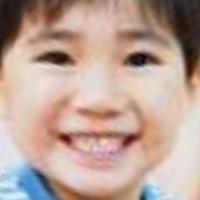

In [ ]:
from os import pathconf
path = "/content/drive/MyDrive/SAE_S5/7_0_2_20161219190327212.jpg.chip.jpg"

Image.open(path)

In [ ]:
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


image = cv2.resize(image, (128, 128))


image = image / 255.0


image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=-1)
print(image.shape)
predicted_age_normalized = model.predict(image)

# Inverser la normalisation des prédictions
predicted_age = scaler.inverse_transform(predicted_age_normalized)

# Afficher le résultat
print(f"L'âge prédit est: {predicted_age[0][0]:.2f} ans")

(1, 128, 128, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
L'âge prédit est: 9.89 ans


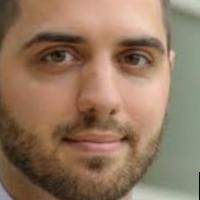

In [ ]:
from os import pathconf
path2 = "/content/drive/MyDrive/SAE_S5/40_0_0_20170116235455068.jpg.chip.jpg"

Image.open(path2)

In [ ]:
image = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)


image = cv2.resize(image, (128, 128))


image = image / 255.0


image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=-1)
print(image.shape)
predicted_age_normalized = model.predict(image)

# Inverser la normalisation des prédictions
predicted_age = scaler.inverse_transform(predicted_age_normalized)

# Afficher le résultat
print(f"L'âge prédit est: {predicted_age[0][0]:.2f} ans")

(1, 128, 128, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
L'âge prédit est: 24.88 ans


In [ ]:

def predict_age_from_image(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    img = cv2.imread(image_path)
                # Conversion en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("Aucun visage détecté.")
        return None

    # Si un visage est détecté, extraire et redimensionner pour l'entrée du modèle
    x, y, w, h = faces[0]
    face_img = gray[y:y+h, x:x+w]  # Extraire la région du visage
    face_img = cv2.resize(face_img, (128, 128))  # Redimensionnement

    # Normalisation et préparation pour la prédiction
    face_img = face_img / 255.0
    face_img = np.expand_dims(face_img, axis=0)
    face_img = np.expand_dims(face_img, axis=-1)

    # Prédiction
    predicted_age = model.predict(face_img)
    return predicted_age[0][0]  #no rounded
"""
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


image = cv2.resize(image, (128, 128))


image = image / 255.0


image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=-1)
print(image.shape)
predicted_age = model.predict(image)
print(f"L'âge prédit est: {predicted_age[0][0]:.2f} ans")
"""

age = predict_age_from_image(path)
if age is not None:
    print(f"L'âge prédit est : {age:.2f} ans")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
L'âge prédit est : 0.13 ans


## Model gender and age prediction

In [ ]:
# Unzip the CelebA
! unzip /content/drive/MyDrive/SAE_S5/UTKFace.zip -d UTKFace

Archive:  /content/drive/MyDrive/SAE_S5/UTKFace.zip
replace UTKFace/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
BASE_DIR = "/content/UTKFace/UTKFace"

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
  image_path = os.path.join(BASE_DIR,filename)
  temp = filename.split("_")
  age = int(temp[0])
  gender = int(temp[1])
  image_paths.append(image_path)
  age_labels.append(age)
  gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame()
df["image"], df["age"], df["gender"] = image_paths, age_labels, gender_labels
df.head(5)


image  age  gender
0  /content/UTKFace/UTKFace/28_0_0_20170117134849...   28       0
1  /content/UTKFace/UTKFace/54_0_2_20170116193431...   54       0
2  /content/UTKFace/UTKFace/32_0_0_20170117130014...   32       0
3  /content/UTKFace/UTKFace/65_0_0_20170117171101...   65       0
4  /content/UTKFace/UTKFace/2_1_0_201701091941258...    2       1

In [ ]:
gender_dict = {0:"Male",1:"Female"}

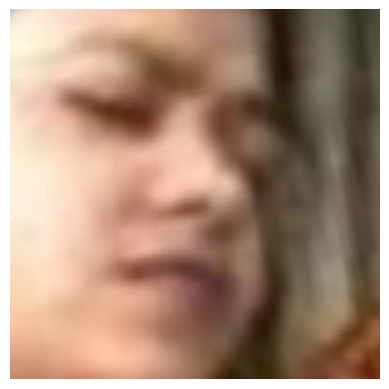

In [ ]:
from PIL import Image
img = Image.open(df["image"][0])
plt.axis("off")
plt.imshow(img);


<Axes: xlabel='age', ylabel='Count'>

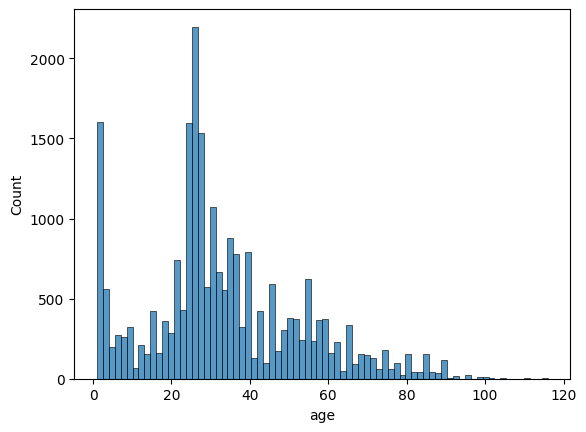

In [ ]:
sns.histplot(df["age"])

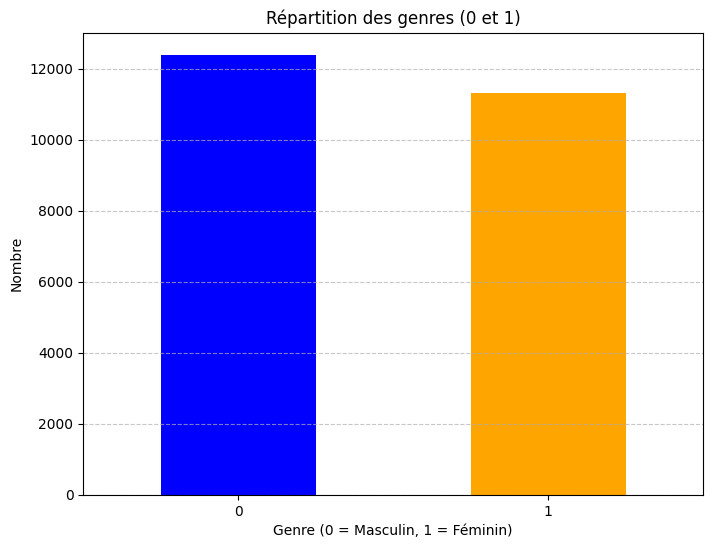

In [ ]:
value_counts = df['gender'].value_counts()

# Créer un graphique
value_counts.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))
plt.title('Répartition des genres (0 et 1)')
plt.xlabel('Genre (0 = Masculin, 1 = Féminin)')
plt.ylabel('Nombre')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

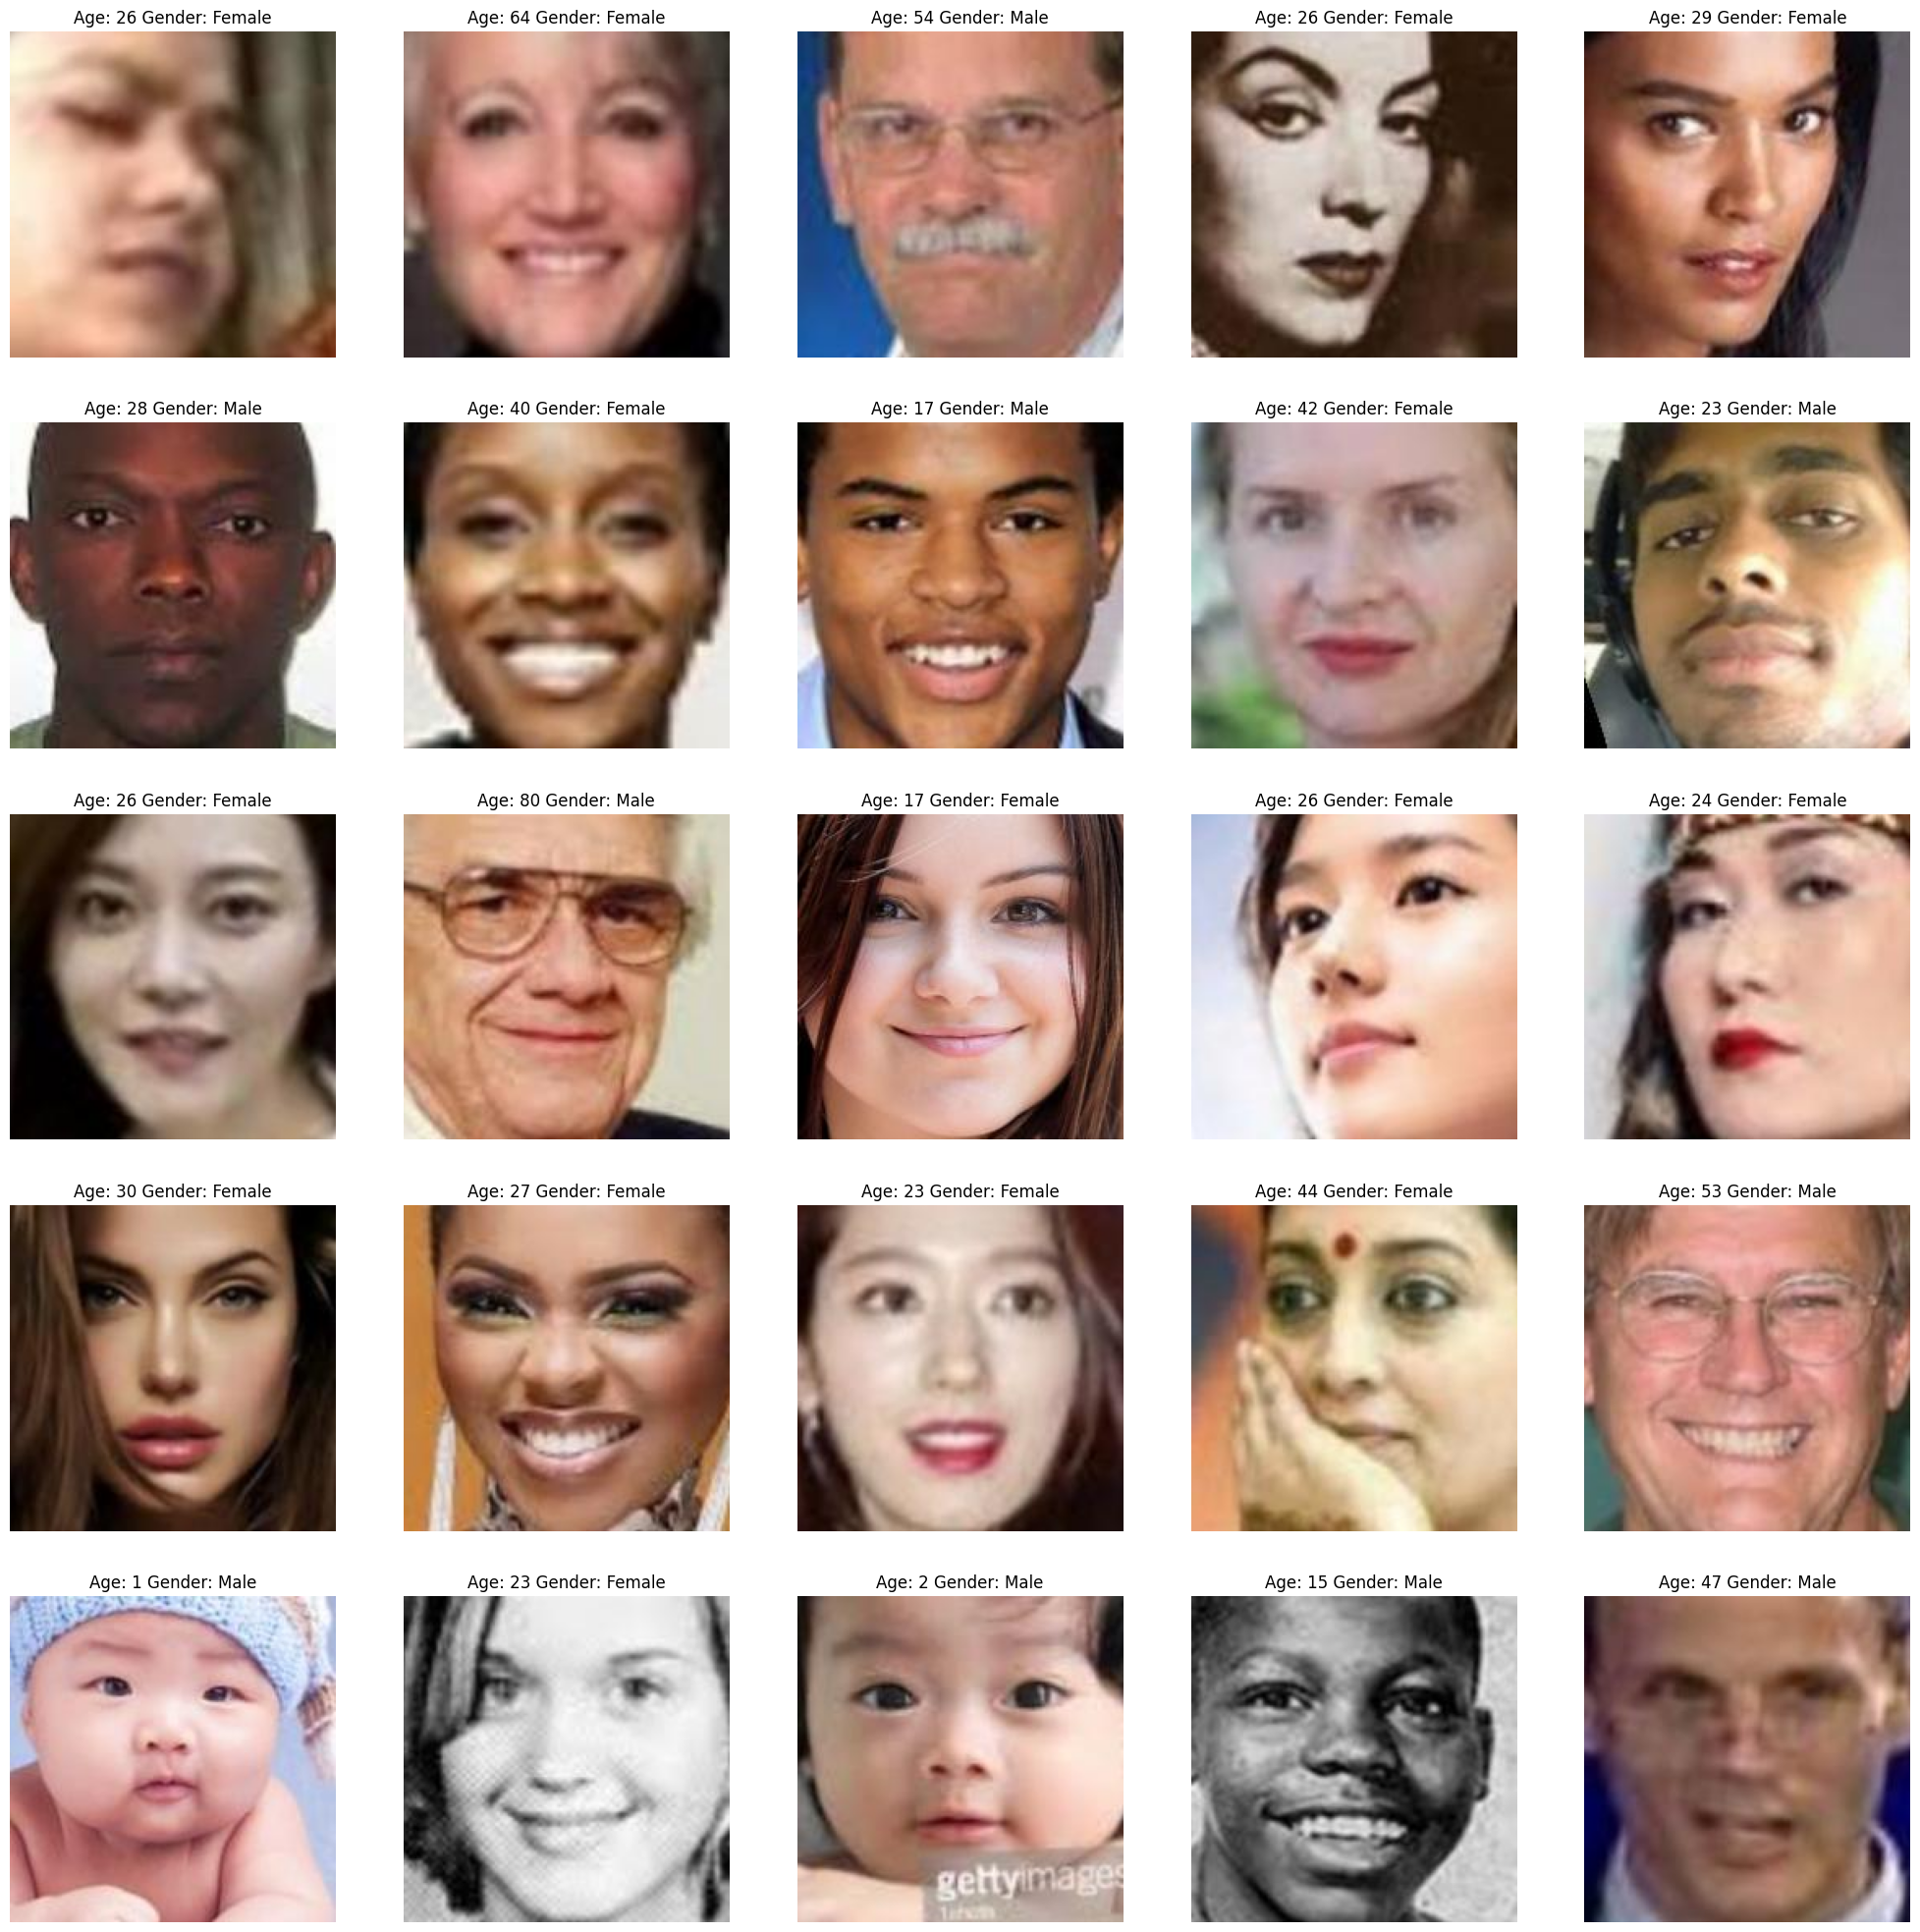

In [ ]:
plt.figure(figsize=(25,25))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
  plt.axis("off")



In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def extract_features(images):
  """
  Extrait les caractéristiques des images et les prépare pour un modèle deep learning.

  Args:
  images (list): Liste des chemins d'accès des images.

  Returns:
  np.array: Tableau NumPy des caractéristiques d'image de forme (n, 128, 128, 1).
  """
  features = []
  for image in tqdm(images, desc="Extraction des caractéristiques"):
    try:
      # Charger l'image en niveaux de gris et redimensionner
      img = load_img(image, color_mode='grayscale', target_size=(128, 128))

      # Convertir en tableau NumPy
      img_array = img_to_array(img)

      # Normaliser les valeurs des pixels
      img_array /= 255.0

      # Ajouter aux caractéristiques
      features.append(img_array)
    except Exception as e:
      print(f"Erreur avec l'image {image}: {e}")

  # Convertir en tableau NumPy final
  features = np.array(features)
  return features

In [ ]:
X = extract_features(df["image"])

Extraction des caractéristiques:   0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
X.shape

(23708, 128, 128, 1)

In [ ]:
y_gender = np.array(df["gender"])
y_age = np.array(df["age"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_gender_train, y_gender_test, y_age_train, y_age_test = train_test_split(
      X, y_gender, y_age, test_size=0.2, random_state=93
)



In [ ]:
import tensorflow as tf

from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPooling2D, AvgPool2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers  import l2
from keras.optimizers import Adam

In [ ]:
input_shape = (128, 128, 1)

In [ ]:
inputs = Input(input_shape)
conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3,3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3,3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3,3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)

flatten = Flatten()(maxp_4)

dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name="gender_out")(dropout_1)
output_2 = Dense(1, activation='relu', name="age_out")(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])


In [ ]:
model.compile(loss=["binary_crossentropy", "mae"], optimizer="adam", metrics=[["accuracy"], ["mae"]])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 126, 126, 32)   │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 63, 63, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 61, 61, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 30, 30, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 28, 28, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 14, 14, 128)    │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 12, 12, 256)    │        295,168 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 6, 6, 256)      │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 9216)           │              0 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │      2,359,552 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │      2,359,552 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 256)            │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gender_out (Dense)        │ (None, 1)              │            257 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ age_out (Dense)           │ (None, 1)              │            257 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,107,458 (19.48 MB)

 Trainable params: 5,107,458 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
model_path: str = "/content/drive/MyDrive/SAE_S5/model/sae_model_gender_age_prediction.keras"

checkpoint = ModelCheckpoint(
    model_path,                   # Le chemin où le modèle sera sauvegardé
    monitor='val_loss',               # La métrique à surveiller pendant l'entraînement
    verbose=1,                    # Afficher des messages lors de l'enregistrement du modèle
    save_best_only=True,          # Ne sauvegarder que le meilleur modèle selon la métrique
    save_weights_only=False,      # Sauvegarder à la fois les poids et la structure du modèle
    mode='min',                  # Choisir le mode d'évaluation (auto, min, max)
    save_freq='epoch'             # Fréquence d'enregistrement du modèle (ici à la fin de chaque époque)
)            # Fréquence d'enregistrement du modèle (ici à la fin de chaque époque)

early_stopping = EarlyStopping(
  monitor='val_loss',
  patience=10,
  restore_best_weights=True,
  verbose=1
)

reduce_lr = ReduceLROnPlateau(
  monitor="val_loss",      # Surveiller la perte de validation
  factor=0.1,              # Réduire le LR par ce facteur
  patience=5,              # Nombre d'époques sans amélioration avant réduction
  min_lr=1e-6,             # LR minimal
  verbose=1
)


callback_list = [checkpoint, early_stopping, reduce_lr]

In [ ]:
history = model.fit(
  x=X_train,
  y=[y_gender_train, y_age_train],
  batch_size=32,
  epochs=150,
  validation_data=(X_test, [y_gender_test, y_age_test]),
  callbacks=callback_list
)


Epoch 1/150
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - age_out_loss: 16.6467 - age_out_mae: 16.6467 - gender_out_accuracy: 0.5215 - gender_out_loss: 0.7077 - loss: 17.3544
Epoch 1: val_loss improved from inf to 12.22011, saving model to /content/drive/MyDrive/SAE_S5/model/sae_model_gender_age_prediction.keras
593/593 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - age_out_loss: 16.6438 - age_out_mae: 16.6438 - gender_out_accuracy: 0.5215 - gender_out_loss: 0.7077 - loss: 17.3515 - val_age_out_loss: 11.7047 - val_age_out_mae: 11.6644 - val_gender_out_accuracy: 0.7305 - val_gender_out_loss: 0.5555 - val_loss: 12.2201 - learning_rate: 0.0010
Epoch 2/150
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - age_out_loss: 11.7202 - age_out_mae: 11.7202 - gender_out_accuracy: 0.7371 - gender_out_loss: 0.5373 - loss: 12.2575
Epoch 2: val_loss improved from 12.22011 to 10.40585, saving model to /content/drive/MyDrive/SAE_S5/model/sae_model_gender_age_prediction.keras
593/593 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - a

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - age_out_loss: 6.0087 - age_out_mae: 6.0087 - gender_out_accuracy: 0.8897 - gender_out_loss: 0.2695 - loss: 6.2782
Loss totale : 6.381616592407227
Loss (gender) : 0.2582818567752838, Accuracy (gender) : 6.123210430145264
Loss (age) : 6.126471042633057, MAE (age) : 0.8951919078826904


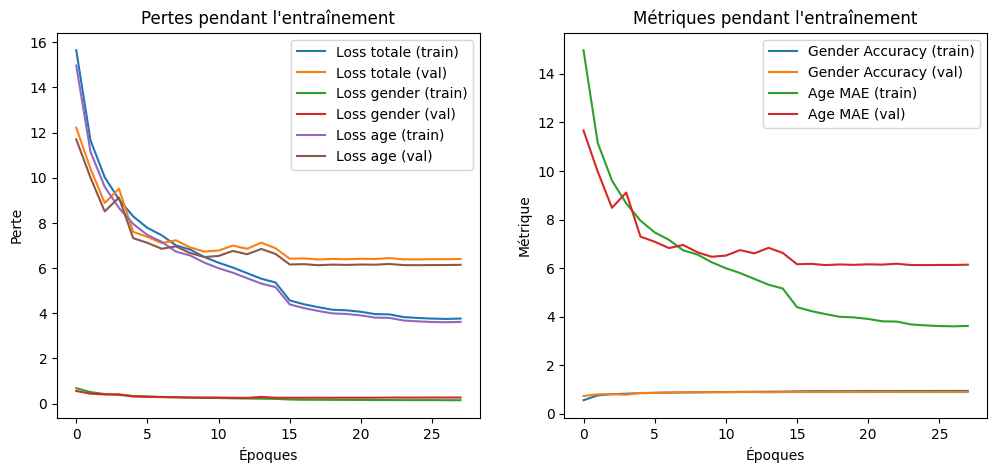

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Image 1:
Vrai genre: 1, Prédit: 1
Vrai âge: 28, Prédit: 32.31

Image 2:
Vrai genre: 0, Prédit: 0
Vrai âge: 22, Prédit: 24.76

Image 3:
Vrai genre: 1, Prédit: 0
Vrai âge: 1, Prédit: 1.04

Image 4:
Vrai genre: 0, Prédit: 1
Vrai âge: 21, Prédit: 23.00

Image 5:
Vrai genre: 0, Prédit: 0
Vrai âge: 45, Prédit: 49.15



In [ ]:
loss, gender_loss, age_loss, gender_acc, age_mae = model.evaluate(
      x=X_test,
          y=[y_gender_test, y_age_test],
              batch_size=32
              )

print(f"Loss totale : {loss}")
print(f"Loss (gender) : {gender_loss}, Accuracy (gender) : {gender_acc}")
print(f"Loss (age) : {age_loss}, MAE (age) : {age_mae}")

# Tracer les courbes de perte et de métriques
def plot_history(history):
  # Pertes
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Loss totale (train)')
  plt.plot(history.history['val_loss'], label='Loss totale (val)')
  plt.plot(history.history['gender_out_loss'], label='Loss gender (train)')
  plt.plot(history.history['val_gender_out_loss'], label='Loss gender (val)')
  plt.plot(history.history['age_out_loss'], label='Loss age (train)')
  plt.plot(history.history['val_age_out_loss'], label='Loss age (val)')
  plt.title('Pertes pendant l\'entraînement')
  plt.xlabel('Époques')
  plt.ylabel('Perte')
  plt.legend()

  # Métriques
  plt.subplot(1, 2, 2)
  plt.plot(history.history['gender_out_accuracy'], label='Gender Accuracy (train)')
  plt.plot(history.history['val_gender_out_accuracy'], label='Gender Accuracy (val)')
  plt.plot(history.history['age_out_mae'], label='Age MAE (train)')
  plt.plot(history.history['val_age_out_mae'], label='Age MAE (val)')
  plt.title('Métriques pendant l\'entraînement')
  plt.xlabel('Époques')
  plt.ylabel('Métrique')
  plt.legend()
  plt.show()

# Appeler la fonction de tracé
plot_history(history)

# Faire des prédictions
y_gender_pred, y_age_pred = model.predict(X_test)

# Binariser les prédictions de genre (0 ou 1)
y_gender_pred_binary = (y_gender_pred > 0.5).astype(int)

# Afficher quelques exemples
for i in range(5):  # Afficher les 5 premiers exemples
  print(f"Image {i+1}:")
  print(f"Vrai genre: {y_gender_test[i]}, Prédit: {y_gender_pred_binary[i][0]}")
  print(f"Vrai âge: {y_age_test[i]}, Prédit: {y_age_pred[i][0]:.2f}")
  print()


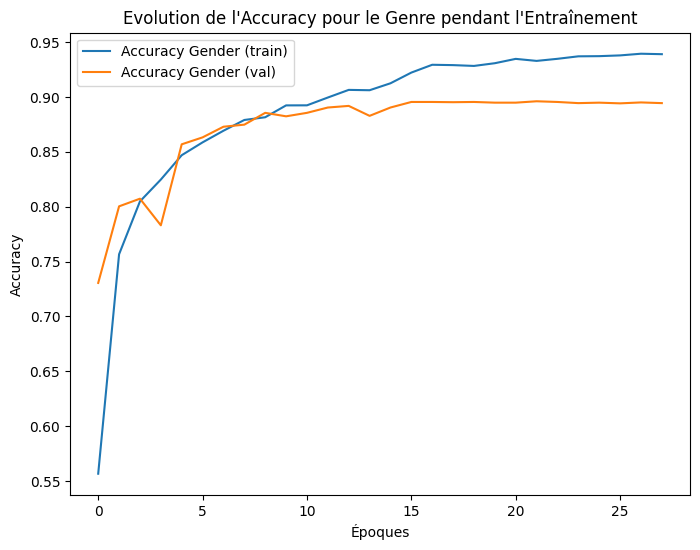

In [ ]:
def plot_gender_accuracy(history):
      # Tracer l'accuracy pour la sortie gender
  plt.figure(figsize=(8, 6))

  # Accuracy pour gender_out
  plt.plot(history.history['gender_out_accuracy'], label='Accuracy Gender (train)')
  plt.plot(history.history['val_gender_out_accuracy'], label='Accuracy Gender (val)')

  # Configuration du graphique
  plt.title('Evolution de l\'Accuracy pour le Genre pendant l\'Entraînement')
  plt.xlabel('Époques')
  plt.ylabel('Accuracy')
  plt.legend()

  # Afficher le graphique
  plt.show()

  # Appeler la fonction avec votre historique d'entraînement
plot_gender_accuracy(history)

In [ ]:
def load_and_predict(image_path, model):
  # Charger l'image avec la bonne taille (128x128 et en niveaux de gris)
  img = load_img(image_path, color_mode='grayscale', target_size=(128, 128))

  # Convertir l'image en tableau NumPy
  img_array = img_to_array(img)

  # Normaliser l'image (les valeurs doivent être entre 0 et 1)
  img_array /= 255.0

  # Ajouter une dimension pour simuler un lot (batch) de taille 1
  img_array = np.expand_dims(img_array, axis=0)

  # Faire la prédiction
  gender_pred, age_pred = model.predict(img_array)

  # Afficher les résultats
  print(f"Prédiction de genre : {'Homme' if gender_pred[0][0] < 0.5 else 'Femme'}")  # Si la probabilité est proche de 0, c'est un homme, sinon c'est une femme
  print(f"Prédiction de l'âge : {age_pred[0][0]:.2f}")     # Âge prédit

  return gender_pred, age_pred

In [ ]:
image_path = '/content/drive/MyDrive/SAE_S5/56_0_0_20170111211219557.jpg.chip.jpg'
gender_pred, age_pred = load_and_predict(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prédiction de genre : Homme
Prédiction de l'âge : 57.94


## Model age and prediction transfer learning

In [2]:
# Unzip the CelebA
! unzip /content/drive/MyDrive/SAE_S5/UTKFace.zip -d UTKFace

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34

In [3]:
# General
import os
import keras
import numpy as np
import pandas as pd
import tensorflow as tf

# Data
import plotly.express as px
import matplotlib.pyplot as plt

# Data Preprocessing
import tensorflow.data as tfds
from sklearn.model_selection import train_test_split

# Model
from keras.applications import VGG16
from keras.applications import Xception, InceptionV3
from keras.applications import ResNet50V2, ResNet152V2
from keras.applications import MobileNetV3Small, MobileNetV3Large

# Model training
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten, GlobalAveragePooling2D
from keras.layers import InputLayer

# Model Callbacks
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [4]:
# Setting constants for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Constants
BATCH_SIZE = 32
IMAGE_SIZE = 224

Total number of images  : 23708
Sample Image path       : 15_1_0_20170109214352795.jpg.chip.jpg
Sample Age              : 15
Sample Gender           : Female



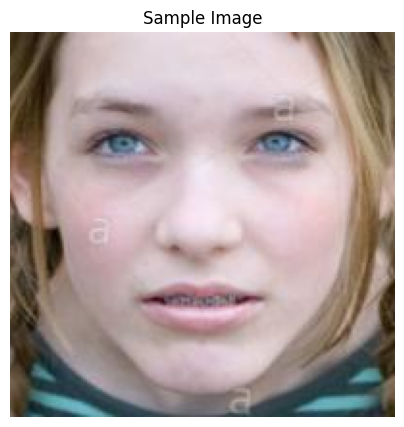

In [5]:
# Initialize the directory path
dir_path = "/content/UTKFace/UTKFace/"
image_paths = os.listdir(dir_path)

# Initialize a Gender Mapping
gender_mapping = ["Male", "Female"]

# Choose and load an image randomly
rand_image_path = np.random.choice(image_paths)
rand_image = plt.imread(dir_path + rand_image_path)/255.
sample_age, sample_gender, *_ = rand_image_path.split("_")

print(f"Total number of images  : {len(image_paths)}")
print(f"Sample Image path       : {rand_image_path}")
print(f"Sample Age              : {sample_age}")
print(f"Sample Gender           : {gender_mapping[int(sample_gender)]}\n")

# Show the image
plt.figure(figsize = (5,5))
plt.title("Sample Image")
plt.imshow(rand_image)
plt.axis("off")
plt.show()

In [6]:
# Initialize a male counter variable
male_count = 0

# Initialize variable to store all the ages.
ages = []

# Loop over the paths and check for male images.
for path in image_paths:
    path_split = path.split("_")
    if "0" == path_split[1]:
      male_count += 1
    ages.append(int(path_split[0]))

                    # Computee total female counts
female_count = len(image_paths) - male_count

# Visualizing The Class Imbalance
pie_chart = px.pie(
names = gender_mapping,
values = [male_count, female_count],
hole = 0.4,
title = "Gender Distribution (Donut Chart)",
height = 500
)
pie_chart.show()

bar_graph = px.bar(
y = gender_mapping,
x = [male_count, female_count],
title = "Gender Distribution (Bar Graph)",
color = gender_mapping,
height = 500
)
bar_graph.update_layout(
yaxis_title = "Gender",
xaxis_title = "Frequency Count"
)
bar_graph.show()

In [7]:
# Histogram
fig = px.histogram(sorted(ages), title = "Age Distribution")
fig.update_layout(
xaxis_title = "Age",
yaxis_title = "Value Counts"
)
fig.show()

# Violin Plot
fig = px.violin(x = sorted(ages), title = "Age Distribution")
fig.update_layout(
xaxis_title = "Age",
yaxis_title = "Distribution"
)
fig.show()

# Box Plot
fig = px.box(x = sorted(ages), notched=True, title = "Age Distribution")
fig.update_layout(
xaxis_title = "Age",
)
fig.show()


In [8]:
# SHuffling the Images
np.random.shuffle(image_paths)

# Split data into training, testing and validation set
train_images, test_images = train_test_split(
  image_paths,
  train_size = 0.9,
  test_size = 0.1
)

train_images, valid_images = train_test_split(
  image_paths,
  train_size = 0.9,
  test_size = 0.1
)

print(f"Training Size : {len(train_images)}")
print(f"Testing Size  : {len(test_images)}")

# Extract age and gender
train_ages = [int(path.split("_")[0]) for path in train_images]
train_genders = [int(path.split("_")[1]) for path in train_images]

valid_ages = [int(path.split("_")[0]) for path in valid_images]
valid_genders = [int(path.split("_")[1]) for path in valid_images]

test_ages = [int(path.split("_")[0]) for path in test_images]
test_genders = [int(path.split("_")[1]) for path in test_images]

Training Size : 21337
Testing Size  : 2371


In [9]:
def show_image(image, show=False):
  """
  Displays the provided image without axis.

  Args:
  - image (array-like): The image data to be displayed.
  - show (bool): If True, displays the image immediately. Defaults to False.

  Returns:
  - None
  """
  plt.imshow(image)
  plt.axis("off")

  if show:
    plt.show()


def preprocess_age_data(image_path, age, gender, dir_path=dir_path, IMAGE_SIZE = IMAGE_SIZE):
  """
  Preprocesses an image for analysis by extracting age and gender from the image path,
  loading and decoding the image, resizing it to (IMAGE_SIZE,IMAGE_SIZE), normalizing pixel values,
  and returning the preprocessed image along with age and gender labels.

  Args:
  - image_path (str): The path to the image file.
  - dir_path (str): The directory path where the image is located. Defaults to `dir_path`.

  Returns:
  - tuple: A tuple containing the preprocessed image as a TensorFlow tensor,
  the age (int), and the gender (int) extracted from the image path.
  """
  # Load the Image
  image = tf.io.read_file(dir_path + image_path)
  image = tf.io.decode_jpeg(image)

  # Resize and Normalize the Image
  image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
  image = image / 255.
  image = tf.cast(image, tf.float32)

  return image, age

def preprocess_gender_data(image_path, age, gender, dir_path=dir_path, IMAGE_SIZE = IMAGE_SIZE):
  """
  Preprocesses an image for analysis by extracting age and gender from the image path,
  loading and decoding the image, resizing it to (IMAGE_SIZE,IMAGE_SIZE), normalizing pixel values,
  and returning the preprocessed image along with age and gender labels.

  Args:
  - image_path (str): The path to the image file.
  - dir_path (str): The directory path where the image is located. Defaults to `dir_path`.

  Returns:
  - tuple: A tuple containing the preprocessed image as a TensorFlow tensor,
  the age (int), and the gender (int) extracted from the image path.
  """
  # Load the Image
  image = tf.io.read_file(dir_path + image_path)
  image = tf.io.decode_jpeg(image)

  # Resize and Normalize the Image
  image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
  image = image / 255.
  image = tf.cast(image, tf.float32)

  return image, gender


In [10]:


# Obtain training, testing and validation datasets
train_ds = tfds.Dataset.from_tensor_slices((train_images, train_ages, train_genders)).shuffle(2000)
train_age_ds = train_ds.map(preprocess_age_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)
train_gender_ds = train_ds.map(preprocess_gender_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)

valid_ds = tfds.Dataset.from_tensor_slices((valid_images, valid_ages, valid_genders)).shuffle(2000)
valid_age_ds = valid_ds.map(preprocess_age_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)
valid_gender_ds = valid_ds.map(preprocess_gender_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)

test_ds  = tfds.Dataset.from_tensor_slices((test_images, test_ages, test_genders)).shuffle(500)
test_age_ds = test_ds.map(preprocess_age_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)
test_gender_ds = test_ds.map(preprocess_gender_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)



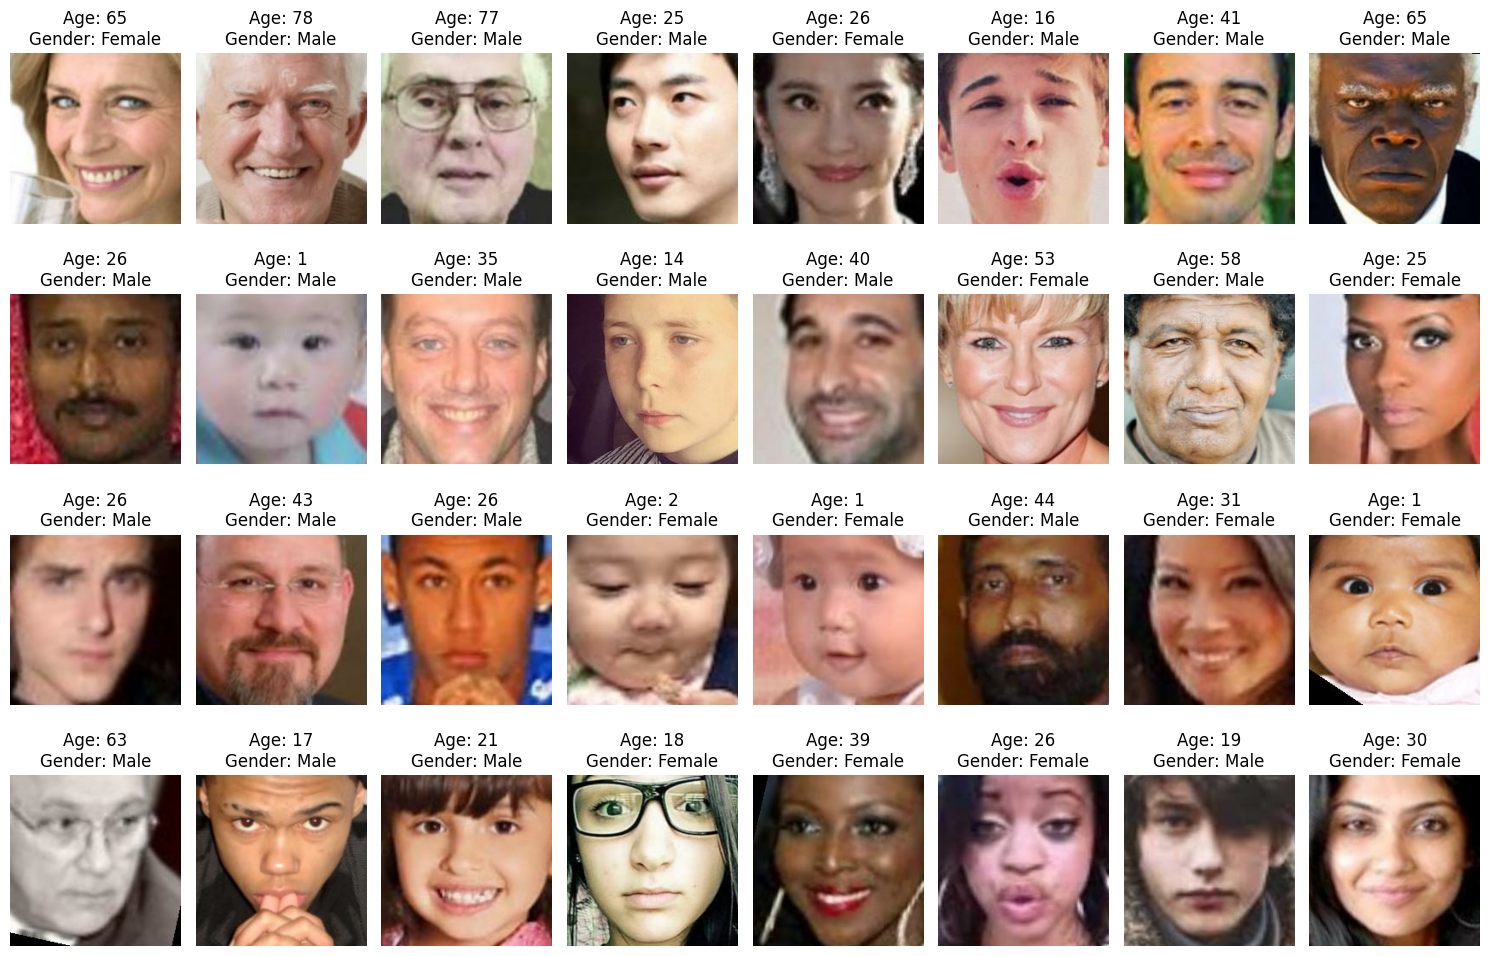

In [11]:
plt.figure(figsize=(15, 10))
for images, ages, genders in train_ds.batch(BATCH_SIZE).take(1):

  for index in range(len(images)):
    image = tf.io.read_file(dir_path + images[index])
    image = tf.io.decode_jpeg(image)
    plt.subplot(4, 8, index + 1)
    plt.imshow(image)
    plt.title(f"Age: {ages[index]}\nGender: {gender_mapping[genders[index]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [12]:
# Initializing all the Backbones
backbones = [
    (
    "VGG16",
    VGG16(
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
    weights = "imagenet",
    include_top = False
    )
  ),
  (
    "ResNet50V2",
    ResNet50V2(
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
    weights = "imagenet",
    include_top = False
    )
  ),

  (
    "ResNet152V2",
    ResNet152V2(
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
    weights = "imagenet",
    include_top = False
    )
  ),

  (
    "Xception",
    Xception(
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
    weights = "imagenet",
    include_top = False
    )
  ),

  (
    "InceptionV3",
    InceptionV3(
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
    weights = "imagenet",
    include_top = False
    )
  ),

  (
    "MobileNetV3Small",
    MobileNetV3Small(
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
    weights = "imagenet",
    include_top = False
    )
  ),

  (
    "MobileNetV3Large",
    MobileNetV3Large(
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
    weights = "imagenet",
    include_top = False
    )
  ),
]

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:


BACKBONE_HISTORIES = {}

for (name, backbone) in backbones:

  print(f"Testing : {name}")

  # Freeze the Model weights
  backbone.trainable = False

  # Creating a base model
  model = keras.Sequential([
  InputLayer((IMAGE_SIZE, IMAGE_SIZE, 3), name = "InputLayer"),
  backbone,
  Dropout(0.2, name = "SlightDropout"),
  Flatten(name = "FlattenEmbeddings"),
  Dense(1, name = "Age")
  ])

  # Train the model for few iterations
  model.compile(
  loss = ["mae"],
  optimizer = "adam",
  weighted_metrics=[]
  )

  history = model.fit(
  train_age_ds,
  validation_data = valid_age_ds,
  epochs = 5,
  batch_size = BATCH_SIZE
  )

  BACKBONE_HISTORIES[name] = pd.DataFrame(history.history)
  print("\n")



Testing : VGG16
Epoch 1/5
667/667 ━━━━━━━━━━━━━━━━━━━━ 101s 143ms/step - loss: 12.8222 - val_loss: 9.3344
Epoch 2/5
667/667 ━━━━━━━━━━━━━━━━━━━━ 138s 141ms/step - loss: 9.1265 - val_loss: 8.7192
Epoch 3/5
667/667 ━━━━━━━━━━━━━━━━━━━━ 98s 146ms/step - loss: 8.5190 - val_loss: 8.4298
Epoch 4/5
667/667 ━━━━━━━━━━━━━━━━━━━━ 140s 143ms/step - loss: 8.1570 - val_loss: 8.2347
Epoch 5/5
667/667 ━━━━━━━━━━━━━━━━━━━━ 99s 148ms/step - loss: 7.9466 - val_loss: 8.1061


Testing : ResNet50V2
Epoch 1/5
667/667 ━━━━━━━━━━━━━━━━━━━━ 76s 96ms/step - loss: 10.7630 - val_loss: 8.8539
Epoch 2/5
667/667 ━━━━━━━━━━━━━━━━━━━━ 51s 77ms/step - loss: 8.6066 - val_loss: 8.9237
Epoch 3/5
667/667 ━━━━━━━━━━━━━━━━━━━━ 52s 77ms/step - loss: 8.0974 - val_loss: 8.6004
Epoch 4/5
667/667 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - loss: 7.8137 - val_loss: 8.8298
Epoch 5/5
667/667 ━━━━━━━━━━━━━━━━━━━━ 52s 77ms/step - loss: 7.6387 - val_loss: 8.8824


Testing : ResNet152V2
Epoch 1/5
667/667 ━━━━━━━━━━━━━━━━━━━━ 179s 234ms/step - 

KeyboardInterrupt: 

In [ ]:
BACKBONE_HISTORIES = {}

for (name, backbone) in backbones:

  print(f"Testing : {name}")

  # Freeze the Model weights
  backbone.trainable = False

  # Creating a base model
  model = keras.Sequential([
  InputLayer((IMAGE_SIZE, IMAGE_SIZE, 3), name = "InputLayer"),
  backbone,
  Dropout(0.2, name = "SlightDropout"),
  Flatten(name = "FlattenEmbeddings"),
  Dense(1, activation="sigmoid", name = "Age")
  ])

  # Train the model for few iterations
  model.compile(
  loss = ["binary_crossentropy"],
  optimizer = "adam",
  metrics = ['accuracy'],
  weighted_metrics=[]
  )

  history = model.fit(
  train_gender_ds,
  validation_data = valid_gender_ds,
  epochs = 5,
  batch_size = BATCH_SIZE
  )

  BACKBONE_HISTORIES[name] = pd.DataFrame(history.history)
  print("\n")


In [ ]:
# Loading backbone
vgg_16 = VGG16(input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3), include_top = False, weights = "imagenet")

# Freezing the backbone weights
vgg_16.trainable = False

# Creating a Age Network
age_net = Sequential([
  InputLayer((IMAGE_SIZE, IMAGE_SIZE, 3), name="ImageInput"),
  vgg_16,
  Dropout(0.4, name = "SlightDroput"),
  Flatten(name="FlattenEmbeddings"),
  Dense(256, activation="relu", kernel_initializer="he_normal"),
  Dense(1, name="AgeOutput")
], name="AgeNet")

# Compiling Model
age_net.compile(
  loss = "mae",
  optimizer = 'adam',
  weighted_metrics=[]
)

In [ ]:
# Trining the Age Model
age_history = age_net.fit(
  train_age_ds,
  validation_data = valid_age_ds,
  epochs = 20,
  batch_size = BATCH_SIZE,
  callbacks = [
    EarlyStopping(
    patience = 5,
    monitor = "val_loss",
    restore_best_weights = True
    ),

    ModelCheckpoint(
    "Age-VGG16.keras",
    save_best_only=True
    )
  ]
)

In [ ]:
# Initializing the backbone layer
resnet = ResNet152V2(input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3), include_top = False, weights="imagenet")

# Freeze the backbone weights
resnet.trainable = False

# Creating a gender model
gender_net = Sequential([
InputLayer((IMAGE_SIZE, IMAGE_SIZE, 3), name="ImageInput"),
resnet,
Dropout(0.2, name = "SlightDroput"),
GlobalAveragePooling2D(name="GlobalAvgPooling"),
Dense(1, activation="sigmoid", name="gender")
], name="GenderNet")

gender_net.compile(
loss = "binary_crossentropy",
optimizer = 'adam',
metrics = ['accuracy'],
weighted_metrics=[]
)


In [ ]:
# Training the Gender Model
gender_history = gender_net.fit(
train_gender_ds,
validation_data = valid_gender_ds,
epochs = 20,
batch_size = BATCH_SIZE,
callbacks = [
EarlyStopping(
patience = 5,
monitor = "val_accuracy",
restore_best_weights = True
),

ModelCheckpoint(
"Gender-ResNet152.keras",
save_best_only=True
)
]
)


In [ ]:


# Loading saved models
age_net = tf.keras.models.load_model("/content/Age-VGG16.keras", compile=True)
gender_net = tf.keras.models.load_model("/content/Gender-ResNet152.keras", compile=True)



In [ ]:


# Evaluating test performance
age_net.evaluate(test_age_ds)
gender_net.evaluate(test_gender_ds)



In [ ]:


plt.figure(figsize=(15, 10))
for images, ages, genders in test_ds.batch(BATCH_SIZE).take(1):
  for index in range(len(images)):

    # Image Processing
    image = tf.io.read_file(dir_path + images[index])
    image = tf.io.decode_jpeg(image)
    image = tf.cast(image, tf.float32)
    image = image/255.
    image = tf.image.resize(image, [224,224])
    image = tf.reshape(image, [-1,224,224,3])

    # Predictions
    pred_age = tf.round(tf.squeeze(age_net.predict(image, verbose=0)), 2)
    pred_gender = tf.round(tf.squeeze(gender_net.predict(image, verbose=0)))

    # Visualization
    plt.subplot(4, 8, index + 1)
    plt.imshow(image[0])
    plt.title(f"Age: {int(pred_age)}\nGender: {gender_mapping[int(pred_gender)]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

